# Eukaryotic Data Example
**Note:** Requires PyModulon version 1.0.0 installed

This notebook uses several functions for use with Eukarotic organisms, primarily. The gff processing functions are intended for yeast and other single cell organisms, with example being given for S. cerevisiae and Y. lipolitica. 

In [1]:
from pymodulon.gene_util import *
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore", 'This pattern is')

In [2]:
import pymodulon
from pymodulon.core import IcaData
from pymodulon.plotting import *
from os import path
import pandas as pd
import re
from Bio.KEGG import REST
from tqdm.notebook import tqdm
from pymodulon.compare import *
from pymodulon.io import *
import scipy as sp

In [3]:
fasta_files = ["../data/yeast_data/sequence_files/GCF_000146045.2_R64_genomic.fna"]

gff_files = ["../data/yeast_data/sequence_files/GCF_000146045.2_R64_genomic.gff"]

In [4]:
X = pd.read_csv("../data/processed_data/log_tpm_norm.csv", index_col=0)
for index in X.index: # remove 'gene-' from each gene 
    X.rename(index={index:index.strip('gene-')},inplace=True)

In [5]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein', "chr"]

DF_annot = gff2pandas_yeast(gff_files,index='locus_tag', feature=["mRNA", "CDS", "rRNA", "ncRNA", "tRNA", "snoRNA", "antisense_RNA", 
                                                            "transcript", "RNase_MRP_RNA", "snRNA", "telomerase_RNA",
                                                           "SRP_RNA", "RNase_P_RNA", 'gene'])
DF_annot = DF_annot[keep_cols]

,chr
locus_tag,
YAL068C,I
YAL067W-A,I
YAL067C,I
YAL065C,I
YAL064W-B,I
...,...
tT(UAG)Q2,MT
tV(UAC)Q,MT
Q0275,MT


In [6]:
DF_annot.head(10)

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,chr
locus_tag,,,,,,,,,
Q0020,NC_001224.1,6546,8194,+,15S_RRNA,None,15S ribosomal RNA,None,MT
Q0045,NC_001224.1,13818,26701,+,COX1,None,cytochrome c oxidase subunit 1,None,MT
Q0050,NC_001224.1,13818,16322,+,AI1,None,intron-encoded reverse transcriptase aI1,None,MT
Q0055,NC_001224.1,13818,18830,+,AI2,None,intron-encoded reverse transcriptase aI2,None,MT
Q0060,NC_001224.1,13818,19996,+,AI3,None,intron-encoded DNA endonuclease aI3,None,MT
Q0065,NC_001224.1,13818,21935,+,AI4,None,intron-encoded DNA endonuclease aI4,None,MT
Q0070,NC_001224.1,13818,23167,+,AI5_ALPHA,None,intron-encoded DNA endonuclease aI5 alpha,None,MT
Q0075,NC_001224.1,24156,25255,+,AI5_BETA,None,intron-encoded DNA endonuclease aI5 beta,None,MT
Q0080,NC_001224.1,27666,27812,+,ATP8,None,F1F0 ATP synthase subunit 8,None,MT


In [7]:
chrom_sizes = get_chrom_sizes(gff_files)
chrom_sizes

,length,location
I,230218.0,0.0
II,813184.0,230218.0
III,316620.0,1043402.0
IV,1531933.0,1360022.0
V,576874.0,2891955.0
VI,270161.0,3468829.0
VII,1090940.0,3738990.0
VIII,562643.0,4829930.0
IX,439888.0,5392573.0
X,745751.0,5832461.0


In [8]:
gff_files = ["../data/yeast_data/sequence_files/Yarrowia_lipolytica_genomic.gff"]

In [9]:
keep_cols = ['accession','start','end','strand','gene_name','old_locus_tag','gene_product','ncbi_protein', "chr"]

DF_annot = gff2pandas_yeast(gff_files,index='locus_tag', feature=["mRNA", "CDS", "rRNA", "ncRNA", "tRNA", "snoRNA", "antisense_RNA", 
                                                            "transcript", "RNase_MRP_RNA", "snRNA", "telomerase_RNA",
                                                           "SRP_RNA", "RNase_P_RNA", 'gene'])
DF_annot = DF_annot[keep_cols]

,chr
locus_tag,
YALI2_A00001g,A
YALI2_A00694g,A
YALI2_A00693g,A
YALI2_A00001r,A
YALI2_A00002r,A
...,...
YALI2_F00484g,F
YALI2_F00027r,F
YALI2_F00481g,F


In [10]:
DF_annot

,accession,start,end,strand,gene_name,old_locus_tag,gene_product,ncbi_protein,chr
locus_tag,,,,,,,,,
YALI2_A00001g,NC_089378.1,733,1665,+,None,None,ATP-dependent DNA helicase PIF7,gnl|CeBiTec|YALI2_A00001g,A
YALI2_A00001r,NC_089378.1,10473,12153,-,None,None,18S ribosomal RNA,None,A
YALI2_A00001t,NC_089378.1,53286,53374,-,None,YALI0_A00220r,tRNA-Arg,None,A
YALI2_A00002g,NC_089378.1,32103,34721,+,None,YALI0_A00110g,Oligopeptide transporter 2,gnl|CeBiTec|YALI2_A00002g,A
YALI2_A00002r,NC_089378.1,24317,24432,-,None,None,5S ribosomal RNA,None,A
...,...,...,...,...,...,...,...,...,...
YALI2_F01004g,NC_089383.1,63490,64158,-,None,YALI0_F00176g,Zinc/cadmium resistance protein,gnl|CeBiTec|YALI2_F01004g,F
YALI2_F01005g,NC_089383.1,62892,63419,-,None,None,Zinc/cadmium resistance protein,gnl|CeBiTec|YALI2_F01005g,F
YALI2_F01006g,NC_089383.1,59171,61697,-,None,YALI0_F00154g,DNA mismatch repair protein MSH2,gnl|CeBiTec|YALI2_F01006g,F


In [11]:
chrom_sizes = get_chrom_sizes(gff_files)
chrom_sizes

,length,location
A,2329538.0,0.0
B,2726341.0,2329538.0
C,4100424.0,5055879.0
D,3707040.0,9156303.0
E,5168480.0,12863343.0
F,3191471.0,18031823.0


# Plotting Functions

Functions tested on sample S. cerevisiae dataset included in the data folder of the repository.

Specification of the chromosome sizes in the ica_data object and gene table will allow for plotting of genes relative to chromosomal location

In [12]:
ica_data_dir = '../data/yeast_data/ica_data/120'

In [13]:
A=pd.read_csv(path.join(ica_data_dir,'A.csv'),index_col=0)
X=pd.read_csv('../data/yeast_data/processed_data/log_tpm_norm.csv',index_col=0)
set(X.columns)-set(A.columns)
A[X.columns].to_csv(path.join(ica_data_dir,'A.csv'))

In [14]:
chr_info = pd.read_csv('../data/yeast_data/processed_data/chromosome_info.csv', index_col=0)

In [15]:
# Specify the chromosome size infor into the ica_data object using the chr_infor table assigned to the chrom argument
ica_data = IcaData(M = path.join(ica_data_dir,'M.csv'),
                   A = path.join(ica_data_dir,'A.csv'),
                   X = '../data/yeast_data/processed_data/log_tpm_norm.csv',
                   log_tpm = '../data/yeast_data/processed_data/log_tpm.csv',
                   gene_table = '../data/yeast_data/processed_data/gene_info.csv',
                   sample_table = '../data/yeast_data/processed_data/metadata.tsv',
                   chrom=chr_info
            )

,gene_weight,gene_name,accession,old_locus_tag,start,end,chr,strand,gene_product,COG,GO,Uniprot
YHL033C,0.086832,RPL8A,NC_001140.6,NaN,35255,36025,VIII,-,ribosomal 60S subunit protein L8A,"Translation, ribosomal structure and biogenesis","structural constituent of ribosome,cytoplasmic...",P17076
YLR406C,0.086460,RPL31B,NC_001144.5,NaN,931065,931755,XII,-,ribosomal 60S subunit protein L31B,"Translation, ribosomal structure and biogenesis","structural constituent of ribosome,cytoplasmic...",P0C2H9
YLR061W,0.082917,RPL22A,NC_001144.5,NaN,263194,263948,XII,+,ribosomal 60S subunit protein L22A,No COG annotation,"structural constituent of ribosome,cytoplasmic...",P05749
YGL147C,0.081508,RPL9A,NC_001139.9,NaN,227754,228329,VII,-,ribosomal 60S subunit protein L9A,"Translation, ribosomal structure and biogenesis","structural constituent of ribosome,cytoplasmic...",P05738
YDL083C,0.081027,RPS16B,NC_001136.10,NaN,306926,307789,IV,-,ribosomal 40S subunit protein S16B,"Translation, ribosomal structure and biogenesis","structural constituent of ribosome,cytosolic s...",P0CX52
YBR191W,0.080623,RPL21A,NC_001134.8,NaN,606270,607140,II,+,ribosomal 60S subunit protein L21A,No COG annotation,"structural constituent of ribosome,cytoplasmic...",Q02753
YKL006W,0.080564,RPL14A,NC_001143.9,NaN,431906,432720,XI,+,ribosomal 60S subunit protein L14A,"Translation, ribosomal structure and biogenesis","RNA binding,structural constituent of ribosome...",P36105
YBR189W,0.080178,RPS9B,NC_001134.8,NaN,604508,605508,II,+,ribosomal 40S subunit protein S9B,No COG annotation,"rRNA binding,rRNA binding,rRNA binding,maturat...",P05755
YHR010W,0.079980,RPL27A,NC_001140.6,NaN,126521,127492,VIII,+,ribosomal 60S subunit protein L27A,No COG annotation,"structural constituent of ribosome,cytoplasmic...",P0C2H6
YLR185W,0.079071,RPL37A,NC_001144.5,NaN,522663,523288,XII,+,ribosomal 60S subunit protein L37A,No COG annotation,"structural constituent of ribosome,cleavage in...",P49166


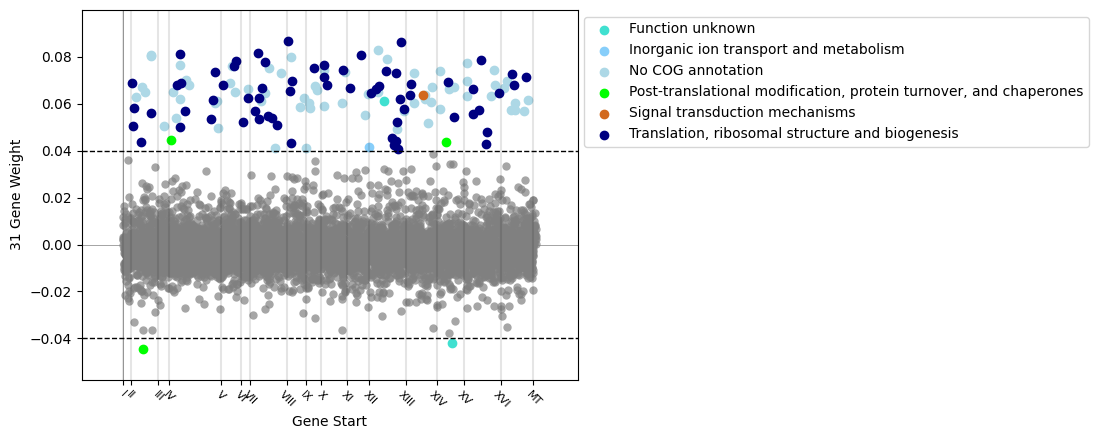

In [16]:
imod = 31
display(ica_data.view_imodulon(imod).sort_values('gene_weight', ascending=False).head(10))
plot_gene_weights(ica_data,imod,show_labels=False,adjust_labels=False);